# Исследование объявлений о продаже квартир

### Навигация по проекту
1. [Откройте файл с данными и изучите общую информацию.](#section1)
2. [Предобработка данных](#section2)
    - [Признак Is_apartment](#section2.1)
    - [Признаки Parks_nearest и Ponds_nearest](#section2.2)
    - [Признак Balcony](#section2.3)
    - [Признак Ceiling_height](#section2.4)
    - [Признаки Airpots_nearest и CityCenters_nearest](#section2.5)
    - [Признаки Parks_around3000 и Ponds_around3000](#section2.6)
    - [Признак Days_exposition](#section2.7)
    - [Признаки Kitchen_area и Living_area](#section2.8)
    - [Признак Floors_total](#section2.9)
    - [Признак Locality_name](#section2.10)
3. [Посчитайте и добавьте в таблицу](#section3)
4. [Проведите исследовательский анализ данных и выполните инструкции](#section4)
4. [Общий вывод](#section5)
5. [Чек-лист готовности проекта](#section6)

<a id='section1'></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [8]:
data.duplicated().sum()

0

### Вывод

В данных присутствует **22** признака: **2** из них имеют тип bool, **3** - тип int, **3** - object, **14** - float.\
Всего **23699** объектов (строк).\
**14** признаков имеют пропуски, причем в большом количестве. Дубликатов не обнаружено.\
Также замечено, что признак **first_day_exposition** содержит в себе дату и время, то есть его можно привести к типу **datetime**.

<a id='section2'></a>
### Шаг 2. Предобработка данных

In [9]:
total = data.isnull().sum().sort_values(ascending=False) # переменная total, содержащая количество пропусков для каждого признака
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False) # доля пропусков для каждого признака
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_missing_values', 'Percent %'])
missing_data['dtype'] = data.dtypes
missing_data.query('Total_missing_values != 0')

,Total_missing_values,Percent %,dtype
is_apartment,20924,0.882906,object
parks_nearest,15620,0.659100,float64
ponds_nearest,14589,0.615596,float64
balcony,11519,0.486054,float64
ceiling_height,9195,0.387991,float64
airports_nearest,5542,0.233850,float64
cityCenters_nearest,5519,0.232879,float64
parks_around3000,5518,0.232837,float64
ponds_around3000,5518,0.232837,float64
days_exposition,3181,0.134225,float64


<a id='section2.1'></a>
### Признак Is_apartment

In [10]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

На мой взгляд, пропуски в данном признаке заполнять не нужно, так как их слишком много, около 90%, и, заполнив пропуски каким-либо значением, можно сильно сместить распределение.\
К тому же данный признак характеризует нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания, как сказано в описании.

<a id='section2.2'></a>
### Признаки Parks_nearest и Ponds_nearest

Mean:
 parks_nearest    490.804555
ponds_nearest    517.980900
dtype: float64
Median:
 parks_nearest    455.0
ponds_nearest    502.0
dtype: float64


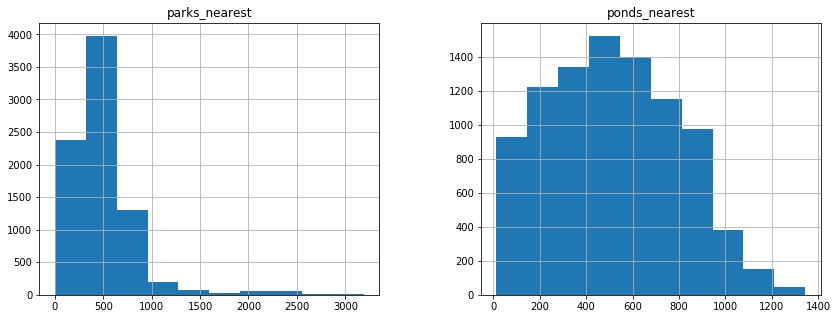

In [11]:
# посмотрим на распределение признаков parks_nearest и ponds_nearest

fig, ax = plt.subplots(figsize=(14,5))
part = data[['parks_nearest', 'ponds_nearest']]
part.hist(ax=ax)
print('Mean:\n', part.mean())
print('Median:\n', part.median())

Parks_nearest
Mean:
 490.8045550191855
Median:
 490.80455501918556
Ponds_nearest
Mean:
 517.9809001097693
Median:
 517.9809001097694


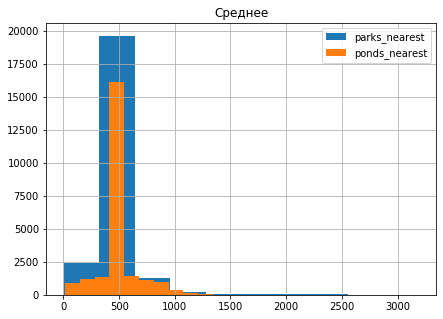

In [12]:
# взглянем на распределение, если заполнить пропуски средним или медианой
import seaborn as sns

#среднее
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Среднее')

part_1 = data['parks_nearest'].fillna(data['parks_nearest'].mean())
part_2 = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())
part_1.hist(ax=ax, label='parks_nearest')
part_2.hist(ax=ax, label='ponds_nearest')
ax.legend()
print('Parks_nearest')
print('Mean:\n', part_1.mean())
print('Median:\n', part_1.median())
print('Ponds_nearest')
print('Mean:\n', part_2.mean())
print('Median:\n', part_2.median())

Parks_nearest
Mean:
 467.20578927380905
Median:
 455.0
Ponds_nearest
Mean:
 508.1431284020423
Median:
 502.0


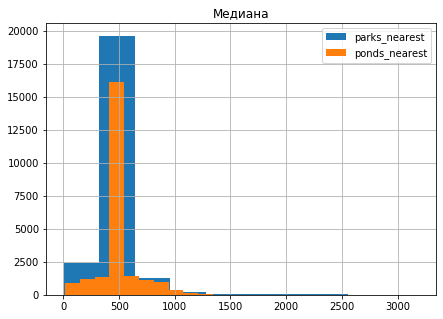

In [13]:
#медиана
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Медиана')

part_1 = data['parks_nearest'].fillna(data['parks_nearest'].median())
part_2 = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
part_1.hist(ax=ax, label='parks_nearest')
part_2.hist(ax=ax, label='ponds_nearest')
ax.legend()

print('Parks_nearest')
print('Mean:\n', part_1.mean())
print('Median:\n', part_1.median())
print('Ponds_nearest')
print('Mean:\n', part_2.mean())
print('Median:\n', part_2.median())

In [14]:
# look at variance of distribution 
print('Parks_nearest var:', data['parks_nearest'].var())
print('Ponds_nearest var:', data['ponds_nearest'].var())

Parks_nearest var: 117181.6096053943
Ponds_nearest var: 77128.75537123933


На мой взгляд, признаки **parks_nearest** и **ponds_nearest**, найденные картографическим путем, имеют пропущенные значениия, так как рядом с данной недвижимостью не было найдено ближайших парков и прудов.\
Основываясь на графиках, можно сказать, что распределение у признаков **parks_nearest** и **ponds_nearest** сильно не сместилось: и при заполнении средним, и при заполнении медианой. При этом в первом случае (при заполнении средним) медиана сравнялось со средним, а во втором случае среднее сравнялось с медианой. Во втором случае практически аналогично.\
Если заполнить эти признаки нулем, то 60% значений станет нулями и распределение обретет положительную ассиметрию.\
Так как **медиана** более устойчива к выбросам, то для заполнения пропусков я выберу ее.

In [15]:
data['parks_nearest'].fillna(data['parks_nearest'].median(), inplace=True)
data['ponds_nearest'].fillna(data['ponds_nearest'].median(), inplace=True)
print(data['parks_nearest'].isna().sum())
print(data['ponds_nearest'].isna().sum())

0
0


In [16]:
print('Parks_nearest var:', data['parks_nearest'].var())
print('Ponds_nearest var:', data['ponds_nearest'].var())

Parks_nearest var: 40232.05921874047
Ponds_nearest var: 29707.067031330083


<a id='section2.3'></a>
### Признак Balcony

Медиана: 1.0
Среднее: 1.1500821018062397


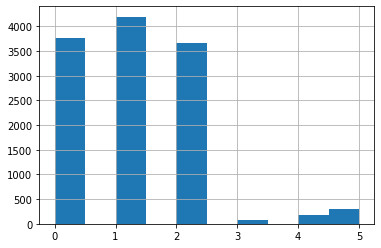

In [17]:
# посмотрим на распределение признака balcony
data['balcony'].hist()
print('Медиана:', data['balcony'].median())
print('Среднее:', data['balcony'].mean())

Как было указано в описании проекта: логично, что если балкон не указан, то скорее всего его нет. Но если мы заполним все пропущенные значения 0 (а их почти 50% от всех данных), то сместим распределение данного признака, поэтому я думаю, что лучше заполнить медианой, причем сгруппировав данные по какому-нибудь критерию.

In [18]:
data['balcony'].fillna(data['balcony'].median(), inplace=True)

In [19]:
data['balcony'].isna().sum()

0

<a id='section2.4'></a>
### Признак Ceiling_height

In [20]:
# посмотрим на перцентили признака ceiling_height
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

1.5902618088659135


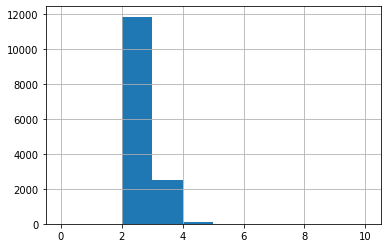

In [21]:
data['ceiling_height'].hist(range=(0,10))
print(data['ceiling_height'].var())

0.9767338560068622

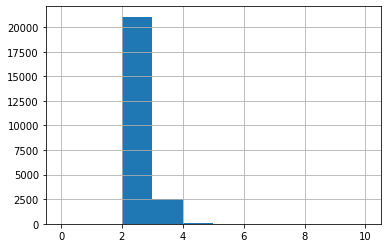

In [22]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].hist(range=(0,10))
data['ceiling_height'].var()

Пытался разбить на категории по какому-либо критерию для того, чтобы сгруппировать данные и заполнить пропуски у признака **ceiling_height** медианой, вычисленной для объектов данной категории.\
Пытался разбить по высоте (установить границы и по ним определять категорию), но не получилось, так как было непонятно в какую категорию определять NaN'ы. Также пытался разбить по этажам, но тоже не вышло.\
Как итог: заполнил **медианой**. Может быть, вы подскажите в какую сторону двигаться...

In [23]:
data['ceiling_height'].isna().sum()

0

<a id='section2.5'></a>
### Признаки Airpots_nearest и CityCenters_nearest

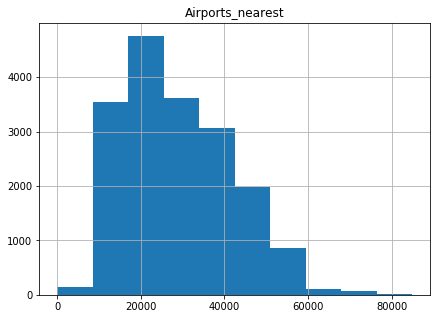

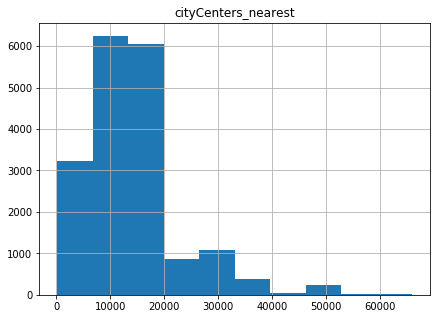

In [24]:
# airpots_nearest
fg, ax = plt.subplots(figsize=(7,5))
ax.set_title('Airports_nearest')
data['airports_nearest'].hist()
plt.show()
# CityCenters_nearest
fg, ax = plt.subplots(figsize=(7,5))
ax.set_title('cityCenters_nearest')
data['cityCenters_nearest'].hist()
plt.show()

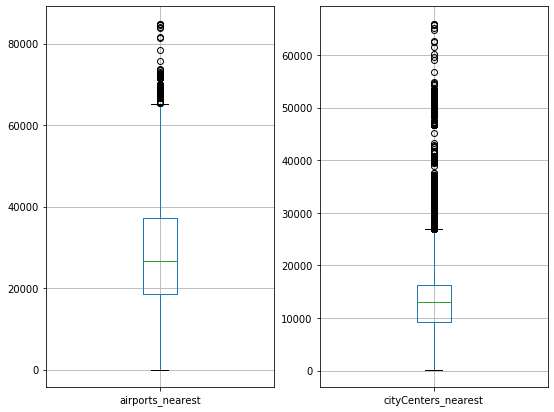

In [25]:
fg, ax = plt.subplots(ncols=2, figsize=(9,7))
data.boxplot('airports_nearest', ax=ax[0])
#plt.show()
data.boxplot('cityCenters_nearest', ax=ax[1])
#plt.show()

Как видно на диаграммах размаха для обеих признаков есть аномальные значения, поэтому заполним пропуски медианой, так как она более устойчива к выбросам.\
Заполним пропуски в зависимости от населенного пункта.

In [26]:
data['locality_name'] = data['locality_name'].astype('str')

In [27]:
for locality in data['locality_name'].unique():
    part = data.query('locality_name == @locality') #loc[data['locality_name']==locality]
    #print(part.shape)
    airports_median = part['airports_nearest'].median()
    city_centers_median = part['cityCenters_nearest'].median()
    if part['airports_nearest'].isna().sum() != 0:
        data.loc[(data['airports_nearest'].isna()) & (data['locality_name']==locality), 'airports_nearest'] = airports_median
    if part['cityCenters_nearest'].isna().sum() != 0:
        data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name']==locality), 'cityCenters_nearest'] = city_centers_median
print(data['airports_nearest'].isna().sum())
print(data['cityCenters_nearest'].isna().sum())

5386
5386


In [28]:
# заполню пропуски вне зависимости от чего-либо
data['airports_nearest'].fillna(data['airports_nearest'].median(), inplace=True)
data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median(), inplace=True)
print(data['airports_nearest'].isna().sum())
print(data['cityCenters_nearest'].isna().sum())

0
0


<a id='section2.6'></a>
### Признаки Parks_around3000 и Ponds_around3000

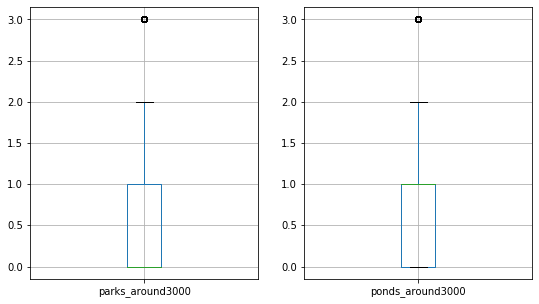

In [29]:
fg, ax = plt.subplots(ncols=2, figsize=(9,5))
data.boxplot('parks_around3000', ax=ax[0])
data.boxplot('ponds_around3000', ax=ax[1])

In [30]:
print(data.query('parks_around3000 > 2.0')['parks_around3000'].value_counts())
print(data.query('ponds_around3000 > 2.0')['ponds_around3000'].value_counts())

3.0    647
Name: parks_around3000, dtype: int64
3.0    1501
Name: ponds_around3000, dtype: int64


Пропущенные значения у данных признаков также заполним **медианой**, чтобы не смещать распределение.

In [31]:
data['parks_around3000'].fillna(data['parks_around3000'].median(), inplace=True)
data['ponds_around3000'].fillna(data['ponds_around3000'].median(), inplace=True)

<a id='section2.7'></a>
### Признак Days_exposition

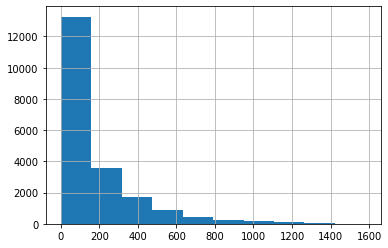

In [32]:
data['days_exposition'].hist()

In [33]:
data[data['days_exposition']>600]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23,11,2950000.0,32.00,2016-10-29T00:00:00,1,2.60,9.0,17.7,9,NaN,...,6.1,1.0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,2.65,5.0,104.0,4,NaN,...,17.0,1.0,Санкт-Петербург,23670.0,3502.0,0.0,455.0,1.0,779.0,644.0
42,13,22000000.0,161.80,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
43,13,9330000.0,48.00,2017-01-10T00:00:00,2,3.00,4.0,28.0,4,NaN,...,7.5,1.0,Санкт-Петербург,15016.0,10822.0,0.0,455.0,1.0,492.0,763.0
61,18,7990000.0,74.00,2017-08-24T00:00:00,2,2.65,4.0,43.0,4,NaN,...,20.0,1.0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,502.0,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.50,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,1.0,Никольское,26757.5,13095.0,0.0,455.0,1.0,502.0,627.0
23664,5,9000000.0,110.00,2015-12-10T00:00:00,4,3.36,7.0,64.6,5,NaN,...,15.8,1.0,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0
23672,5,3000000.0,30.80,2016-06-08T00:00:00,1,2.65,5.0,16.1,3,NaN,...,6.3,1.0,Санкт-Петербург,44614.0,14193.0,2.0,258.0,0.0,502.0,808.0
23675,8,3550000.0,39.50,2016-10-03T00:00:00,1,2.65,16.0,19.0,13,NaN,...,8.5,1.0,Санкт-Петербург,25740.0,14951.0,0.0,455.0,0.0,502.0,721.0


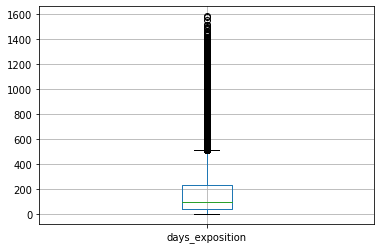

In [34]:
data.boxplot('days_exposition')

In [35]:
print('Median:', data['days_exposition'].median())
print('Mean:', data['days_exposition'].mean())

Median: 95.0
Mean: 180.88863436982163


In [36]:
# попробуем разбить данные по времени года и посмотрим на длительность продажи недвижимости
# сделаем предположение, что длительность продажи зависит от времени года

# для начала приведем столбец first_day_exposition к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [37]:
def year_time(datetime):
    if datetime.month in [1, 2, 12]:
        return 'winter'
    elif datetime.month in [3, 4, 5]:
        return 'spring'
    elif datetime.month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
data['season'] = data['first_day_exposition'].apply(year_time)
season_grouped = data.pivot_table(index='season', values='days_exposition', aggfunc=['count', 'mean', 'median'])
season_grouped.columns = ['count', 'mean', 'median']
season_grouped

,count,mean,median
season,,,
autumn,5941,159.258711,84.0
spring,4658,206.156720,120.0
summer,4873,174.944593,96.0
winter,5046,188.770115,91.0


In [38]:
data['days_exposition'].isna().sum()

3181

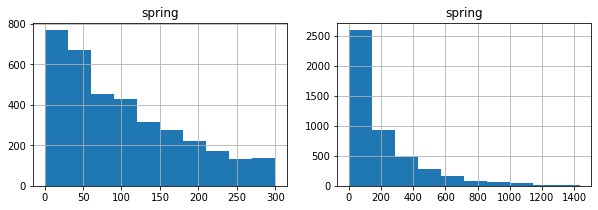

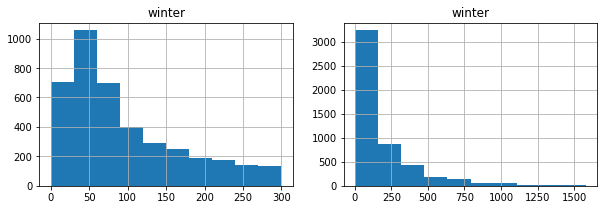

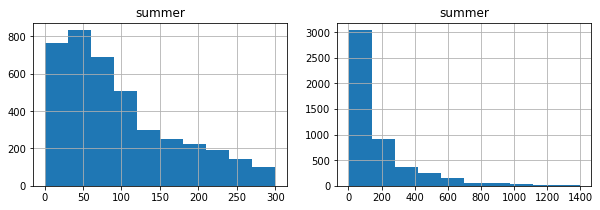

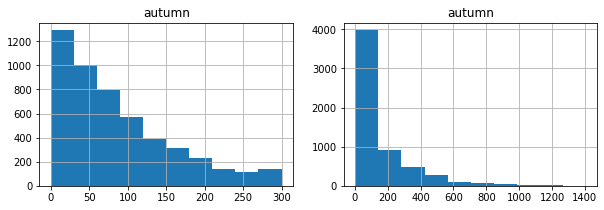

In [39]:
for season in data['season'].unique():
    part = data.query('season == @season')
    part_median = part['days_exposition'].median()
    data.loc[(data['days_exposition'].isna()) & (data['season'] == season), 'days_exposition'] = part_median
    # заодно взглянем на распределение признака days_exposition по сезонам
    fg, ax = plt.subplots(1, 2, figsize=(10,3))
    part['days_exposition'].hist(ax=ax[0], range=(0, 300))
    part['days_exposition'].hist(ax=ax[1])
    ax[0].set_title(season)
    ax[1].set_title(season)
    plt.show()

In [40]:
data['days_exposition'].isna().sum()

0

Я предположил, что длительность продажи может зависеть от времени года. Для этого была создана сводная таблица.
По ней можно сделать следующие выводы:
- быстрее всего объявления снимают с продажи осенью, возможно, из-за того, что люди активно ищут жилье перед холодами;
- дольше всего объявления висят на сайте весной;
- зимой, летом и осенью по две моды, весной - одна;
- для каждого объявления есть аномалии: некоторые объявления не снимают с сайта больше двух лет.\

Так как у признака есть выбросы, для заполнения пропусков была выбрана медиана, так как она более устойчива по сравнению со средним.

<a id='section2.8'></a>
### Признаки Kitchen_area и Living_area

Text(0.5, 1.0, 'living_area')

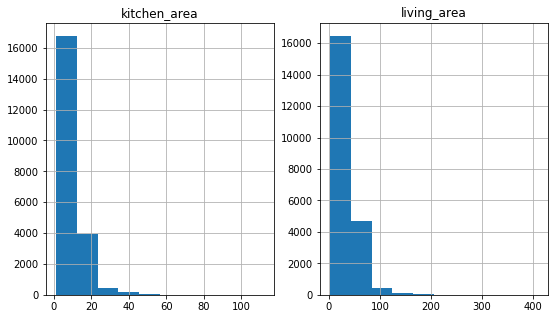

In [41]:
#посмотрим на распределение площади кухни и 
fg, ax = plt.subplots(ncols=2, figsize=(9,5))
data['kitchen_area'].hist(ax=ax[0])
data['living_area'].hist(ax=ax[1])
ax[0].set_title('kitchen_area')
ax[1].set_title('living_area')

In [93]:
# перегруппируем данные в зависимости от количества комнат
rooms_grouped = data.pivot_table(index='rooms', values=['kitchen_area', 'living_area'], aggfunc={
                                                                                    'kitchen_area':['count','mean', 'median'],
                                                                                    'living_area':['count','mean', 'median']})
rooms_grouped

kitchen_area                     living_area                     
             count        mean  median       count        mean   median
rooms                                                                  
0              197    0.000000    0.00         197   18.803756   18.000
1             7981    9.494353    9.04        7981   17.870301   17.600
2             7847    9.851199    8.80        7847   31.604845   30.500
3             5738   11.142161    9.50        5738   47.136954   45.000
4             1152   13.383212   11.10        1152   66.700972   63.600
5              311   17.728167   15.10         311   97.861254   91.785
6              104   21.045481   19.50         104  131.043077  123.900
7               59   21.761017   20.00          59  161.676271  145.000
8               12   24.900000   25.00          12  168.683333  161.000
9                8   23.725000   14.30           8  188.875000  179.200
10               3   22.866667   19.80           3  165.566667  161.400
11               2   12.600000   12.60           2  133.900000  133.900
12               1  112.000000  112.00           1  409.700000  409.700
14               2   21.250000   21.25           2  195.150000  195.150

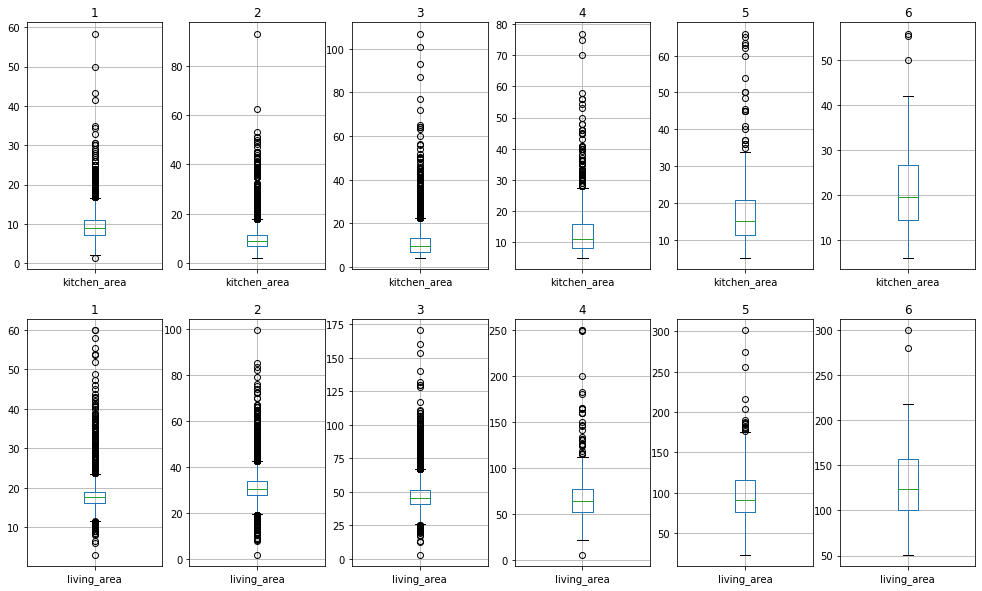

In [43]:
# посмотрим диаграммы размаха площади кухни и жилой площади для квартир с количеством комнат от 1 до 6 включительно
fg, ax = plt.subplots(nrows=2, ncols=6, figsize=(17,10))
for cnt in range(1,7):
    part = data.query('rooms == @cnt')
    part.boxplot('kitchen_area', ax=ax[0][cnt-1])
    part.boxplot('living_area', ax=ax[1][cnt-1])
    ax[0][cnt-1].set_title(cnt)
    ax[1][cnt-1].set_title(cnt)
#ax[0].set_title('kitchen_area')
#ax[1].set_title('living_area')

In [44]:
# заполним пропуски медианой, вычисленной для каждой выборки данных в зависимости от количества комнат
for cnt in data['rooms'].unique():
    part = data.query('rooms == @cnt')
    kitchen_median = part['kitchen_area'].median()
    living_median = part['living_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms']==cnt), 'kitchen_area'] = kitchen_median #part['kitchen_area'].fillna(kitchen_median) #, inplace=True
    data.loc[(data['living_area'].isna()) & (data['rooms']==cnt), 'living_area'] = living_median #part['living_area'].fillna(living_median)

In [45]:
# проверим остались ли пропуски
print(data['kitchen_area'].isna().sum())
print(data['living_area'].isna().sum())

197
0


In [46]:
# заметим, что для kitchen_area все же остались пропуски
# это произошло потому, что при числе комнат 0, у этого признака нет кухни, то есть все значения NaN
# исправим это
data['kitchen_area'].fillna(0, inplace=True)

In [47]:
data['kitchen_area'].isna().sum()

0

Мне кажется, что можно организовать заполнение пропусков иначе: учитывая долю площади кухни от общей площади жилья. Но я сделал так, подскажите, пожалуйста, как будет правильнее и разумнее)

<a id='section2.9'></a>
### Признак Floors_total

In [48]:
data['floors_total'].isna().sum()

86

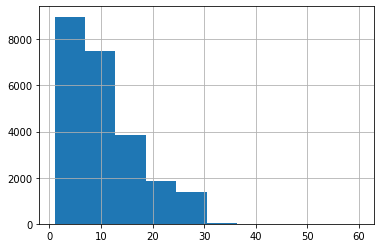

In [49]:
data['floors_total'].hist()

In [50]:
print(data['floors_total'].median())
print(data['floors_total'].mean())

9.0
10.67382374115953


In [51]:
data['floors_total'].fillna(data['floors_total'].median(), inplace=True)
data['floors_total'].isna().sum()

0

Пропусков не так много, поэтому я думаю заполнение средним или медианой, не сильно повлияет на данные.

<a id='section2.10'></a>
### Признак Locality_name

Я думаю, что заполнение пропусков в данном столбце также неуместно, так как возможно эти пропуски что-то означают, например, что данного населенного пункта нет в базе данных системы, возможно, это строящийся коттеджный поселок.

In [52]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
season                      0
dtype: int64

<a id='section3'></a>
### Шаг 3. Посчитайте и добавьте в таблицу

In [53]:
# добавим признак "price_per_square_metr"
data['price_per_square_metr'] = data['last_price']/data['total_area']
data['price_per_square_metr'] = data['price_per_square_metr'].astype(int)
print(data['price_per_square_metr'].isna().sum())

0


In [54]:
# добавим признак "exposition_day", "exposition_month", "exposition_year"

print(data['first_day_exposition'].dtype)

data['exposition_day'] = data['first_day_exposition'].apply(lambda x: x.weekday())
data['exposition_month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['exposition_year'] = data['first_day_exposition'].apply(lambda x: x.year)
print(data['exposition_day'].isna().sum())
print(data['exposition_month'].isna().sum())
print(data['exposition_year'].isna().sum())

datetime64[ns]
0
0
0


In [55]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,season,price_per_square_metr,exposition_day,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,120.0,spring,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,455.0,0.0,502.0,81.0,winter,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,summer,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,NaN,...,2.0,84.0,3.0,234.0,424.0,summer,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,summer,100000,1,6,2018


In [56]:
data['exposition_day'].value_counts()

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: exposition_day, dtype: int64

In [57]:
# добавим 
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_kind'] = data.apply(floor_type, axis=1)

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,season,price_per_square_metr,exposition_day,exposition_month,exposition_year,floor_kind
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,120.0,spring,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,455.0,0.0,502.0,81.0,winter,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,summer,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,NaN,...,84.0,3.0,234.0,424.0,summer,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,summer,100000,1,6,2018,другой


In [59]:
# добавим столбцы соотношнение жилой площади к общей и площади кухни к общей площади
data['living_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,season,price_per_square_metr,exposition_day,exposition_month,exposition_year,floor_kind,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,120.0,spring,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,502.0,81.0,winter,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,summer,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,NaN,...,234.0,424.0,summer,408176,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,summer,100000,1,6,2018,другой,0.320000,0.410000


<a id='section4'></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого признака.

In [61]:
params = ['total_area', 'last_price', 'rooms', 'ceiling_height']
part = data[params]
part.head()

,total_area,last_price,rooms,ceiling_height
0,108.0,13000000.0,3,2.70
1,40.4,3350000.0,1,2.65
2,56.0,5196000.0,2,2.65
3,159.0,64900000.0,3,2.65
4,100.0,10000000.0,2,3.03


In [62]:
part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 4 columns):
total_area        23699 non-null float64
last_price        23699 non-null float64
rooms             23699 non-null int64
ceiling_height    23699 non-null float64
dtypes: float64(3), int64(1)
memory usage: 740.7 KB


In [63]:
part.describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.724358
std,35.654083,1.088701e+07,1.078405,0.988298
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Данные без пропущенных значений. 3 количественных признака и 1 категориальный. Все остальные данные приведены выше.\
Построим гистограммы данных признаков.

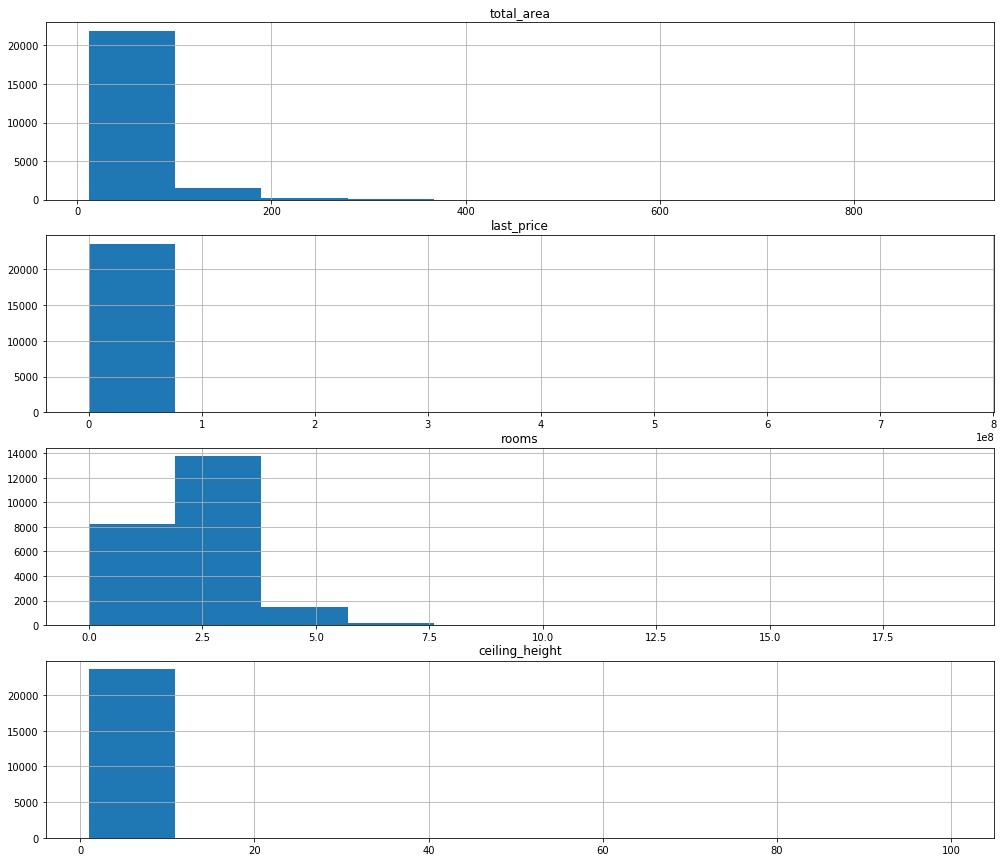

In [64]:
fg, ax = plt.subplots(4, 1, figsize=(17,15))
for idx, feature in enumerate(params):
    part[feature].hist(ax=ax[idx])
    ax[idx].set_title(feature)

#### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. 

In [65]:
data['days_exposition'].describe()

count    23699.000000
mean       170.669058
std        206.168806
min          1.000000
25%         45.000000
50%         96.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

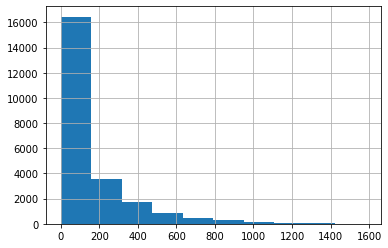

In [66]:
data['days_exposition'].hist(range=(1, 1580))

In [67]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())
print('Мода:', data['days_exposition'].mode())

Среднее: 170.66905776615047
Медиана: 96.0
Мода: 0    120.0
dtype: float64


In [68]:
data[data['days_exposition'] >= 1000].shape

(278, 30)

#### Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
**Ответы на вопросы:** обычно продажа недвижимости в Санкт-Петербурге занимает примерно 100 дней, то есть плюс/минус три месяца.\
Основываясь на статистике данного признака, можно считать, что быстрой продажей можно считать продажу, длившуюся меньше 3 месяцев, например, от 1 дня до 1,5 месяца. Необычно долгой продажу, длившуюся больше 1000 дней.

#### Уберем редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Изучая данные на предыдущих шагах, мною было замечено, что у некоторых признаков есть аномальные значения: у признаков *ceiling_height*, *kitchen_area* и *days_exposition*

In [69]:
data[data['ceiling_height'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,season,price_per_square_metr,exposition_day,exposition_month,exposition_year,floor_kind,living_ratio,kitchen_ratio
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,30.0,19.0,summer,600000,2,7,2018,последний,0.56,0.44


In [70]:
data.shape

(23699, 30)

In [71]:
data = data[(data['ceiling_height'] != 100) & (data['rooms'] <= 14) & (data['rooms'] >= 0) & 
            (data['days_exposition'] < 1000) & (data['last_price'] > 100000) ]

In [72]:
data.shape

(23417, 30)

#### Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [73]:
# построим scatter-plot'ы для каждого признака
features = ['total_area', 'rooms', 'cityCenters_nearest', 'floor_kind', 'exposition_day', 'exposition_month', 'exposition_year']

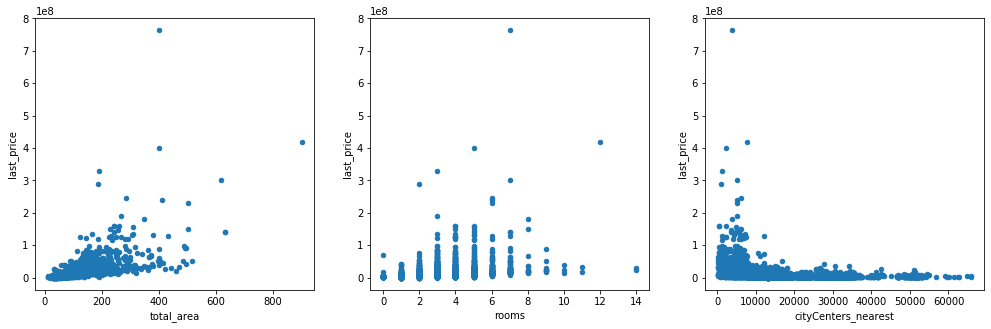

In [74]:
fg, ax = plt.subplots(1, 3, figsize=(17,5))
data.plot('total_area', 'last_price', kind='scatter', ax=ax[0])
data.plot('rooms', 'last_price', kind='scatter', ax=ax[1])
data.plot('cityCenters_nearest', 'last_price', kind='scatter', ax=ax[2])
#data.plot('floor_kind', 'last_price', kind='scatter', ax=ax[1][1]) # нельзя построить, т.к. не числовые значения

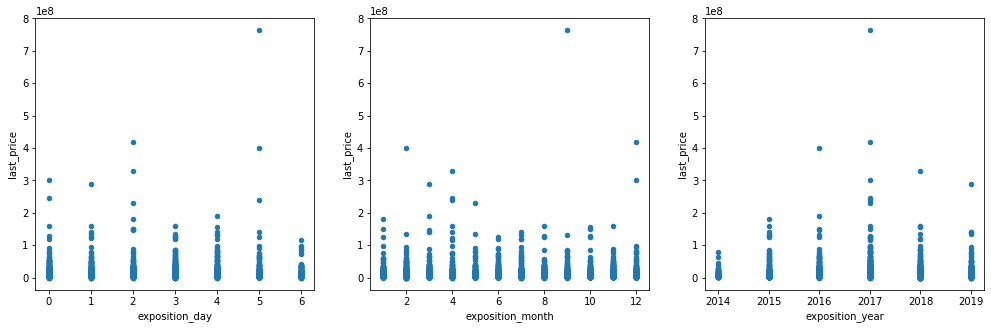

In [75]:
fg, ax = plt.subplots(1, 3, figsize=(17,5))
data.plot('exposition_day', 'last_price', kind='scatter', ax=ax[0])
data.plot('exposition_month', 'last_price', kind='scatter', ax=ax[1])
data.plot('exposition_year', 'last_price', kind='scatter', ax=ax[2])

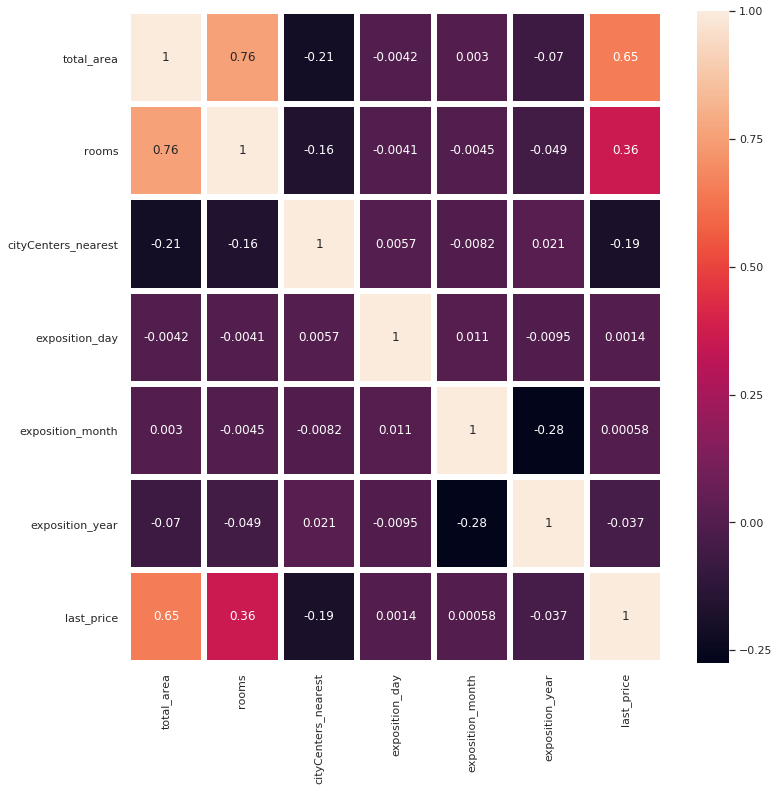

In [76]:
# посмотрим на корреляцию целевого признака и выбранных
features_1 = features + ['last_price']
corr1 = data[features_1].corr(method='pearson')
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr1, 
            xticklabels=corr1.columns,
            yticklabels=corr1.columns,
            annot=True,
            linewidth=5)

In [77]:
data[features].corrwith(data['last_price'], method='pearson')

total_area             0.651914
rooms                  0.361051
cityCenters_nearest   -0.189684
exposition_day         0.001447
exposition_month       0.000583
exposition_year       -0.036579
dtype: float64

In [78]:
data.pivot_table(index='floor_kind', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_kind,,,
другой,17235,6.633035e+06,4800000.0
первый,2879,4.789674e+06,3900000.0
последний,3303,7.301583e+06,4300000.0


**Вывод.** Сделаем выводы по каждому признаку.\
**Признак total_area**: зависимость между ценой и общей площадью существует, это видно и на графике и на heatmap'e, такой результат логичен.
**Признак rooms**: меньшая зависимость (по сравнению с площадью) существует между количеством комнат и ценой. Как видно на диаграмме разброса цена растет до 4-5 комнатной недвижимости, где достигает максимальных значений, а затем идет на спад. Возможно, это связано с тем, что 4-5 комнатная недвижимость преимущественно располагается ближе к центру Санкт-Петербурга, а недвижимость с числом комнат больше 5-6 может располагаться за пределами города - в деревнях, поселках, где преобладает частный сектор.\
**Признак floor_kind**: как видно по сводной таблице в среднем цена для квартир на последнем этаже выше на миллион, по сравнению с остальными, я думаю, что это характеризуется тем, что на последних этажах могут располагаться двухэтажные квартиры или пентхаусы. Самая низкая цена у квартир, расположенных на первом этаже.\
**Признак cityCenters_nearest**: отрицательная корреляция есть между удаленностью от центра и ценой - чем больше расстояние от центра, тем ниже цена. Это показывает и коэф. корреляции, и диаграмма разброса.\
**Признаки exposition_day, exposition_month, exposition_year**: зависимости цены от даты дня недели, месяца и года практически нет, это подтверждает и коэф. корреляции, и графики, за исключением того, что цена на недвижимость в 2017 году была чуть выше, чем в остальные, но может быть, это произошло из-за продажи слишком дорогой недвижимости в этот год.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [79]:
fst = data.pivot_table(index='locality_name', values=['price_per_square_metr'], aggfunc=['count', 'mean'])
fst.columns = ['count_total', 'mean_price_per_square_metr']
snd = data.pivot_table(index='locality_name', values=['last_price'], aggfunc=['min', 'max'])
snd.columns = ['min_price', 'max_price']
res =  fst.merge(snd, on=['locality_name'])
res = res.sort_values(by='count_total', ascending=False)[:10]

In [80]:
res

,count_total,mean_price_per_square_metr,min_price,max_price
locality_name,,,,
Санкт-Петербург,15510,114692.698775,1190000.0,763000000.0
посёлок Мурино,517,85867.390716,1730000.0,8500000.0
посёлок Шушары,436,78615.348624,1500000.0,10990000.0
Всеволожск,394,68699.517766,965780.0,24412900.0
Пушкин,362,103228.201657,1990000.0,42000000.0
Колпино,336,75371.267857,2100000.0,36900000.0
посёлок Парголово,326,90102.711656,1400000.0,9140000.0
Гатчина,307,68745.693811,850000.0,13900000.0
деревня Кудрово,294,92421.074830,1800000.0,13000000.0


In [81]:
# отсортируем по цене за квадрат 
res.sort_values(by='mean_price_per_square_metr', ascending=False)[:3]

,count_total,mean_price_per_square_metr,min_price,max_price
locality_name,,,,
Санкт-Петербург,15510,114692.698775,1190000.0,763000000.0
Пушкин,362,103228.201657,1990000.0,42000000.0
деревня Кудрово,294,92421.074830,1800000.0,13000000.0


In [82]:
# отсортируем по минимальной цене
res.sort_values(by='min_price', ascending=True)[:3]

,count_total,mean_price_per_square_metr,min_price,max_price
locality_name,,,,
Выборг,236,58120.847458,600000.0,19990000.0
Гатчина,307,68745.693811,850000.0,13900000.0
Всеволожск,394,68699.517766,965780.0,24412900.0


In [83]:
# отсортируем по минимальной цене
res.sort_values(by='max_price', ascending=False)[:3]

,count_total,mean_price_per_square_metr,min_price,max_price
locality_name,,,,
Санкт-Петербург,15510,114692.698775,1190000.0,763000000.0
Пушкин,362,103228.201657,1990000.0,42000000.0
Колпино,336,75371.267857,2100000.0,36900000.0


**Вывод:** как и ожидалось, больше всего объявлений размещено в Санкт-Петербурге, здесь же и самая высокая цена за кв.метр - 114685 руб/кв.м. На втором месте по стоимости квадратного метра располагается Пушкин (пригород Санкт-Петербурга).\
Наименьшая стоимость недвижимости в Выборге - 600,000 рублей, также можно заметить, что из трех выбранных здесь наименьшая цена за кв.метр.\
Наибольшая цена в Санкт-Петербурге - 763,000,000 рублей. Разница между макс.ценой в Петербурге и следующим за ним Пушкиным очень большая. 

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [84]:
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].astype('int')
data['cityCenters_km'].isna().sum()

0

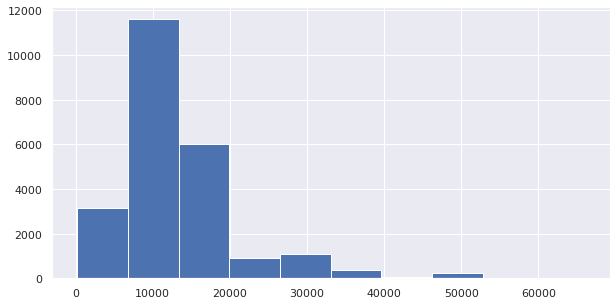

In [85]:
data['cityCenters_nearest'].hist(figsize=(10,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


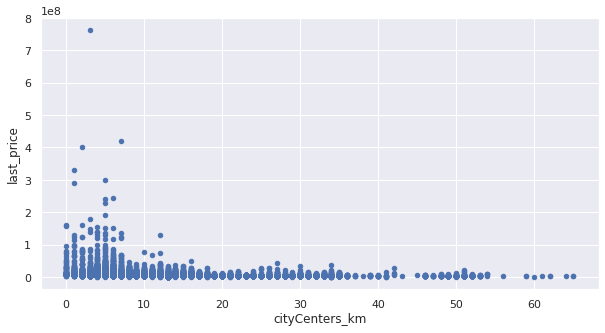

In [86]:
data.plot('cityCenters_km', 'last_price', kind='scatter', figsize=(10,5))

In [87]:
# средняя цена за километр 
mean_price_per_km = data.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
mean_price_per_km

,last_price
cityCenters_km,
0,2.303258e+07
1,1.895523e+07
2,1.629480e+07
3,1.330469e+07
4,1.336256e+07
...,...
60,1.800000e+06
61,3.200000e+06
62,3.400000e+06


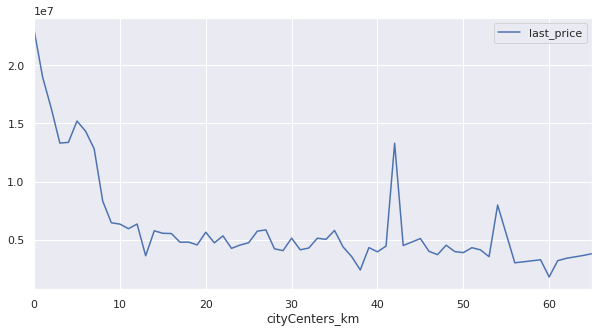

In [88]:
mean_price_per_km.plot(figsize=(10,5))

**Вывод:** если я не ошибаюсь, то центральная зона - 10 км.

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [89]:
center_data = data.query('cityCenters_km <= 10')
features = ['total_area', 'rooms', 'ceiling_height', 'last_price']
center_data[features].describe()

,total_area,rooms,ceiling_height,last_price
count,5892.000000,5892.000000,5892.000000,5.892000e+03
mean,79.411797,2.516972,2.868206,1.169292e+07
std,52.492873,1.305441,0.843757,2.005798e+07
min,12.000000,0.000000,2.000000,1.600000e+06
25%,46.000000,2.000000,2.650000,5.190000e+06
50%,66.500000,2.000000,2.650000,7.500000e+06
75%,94.500000,3.000000,3.000000,1.194000e+07
max,900.000000,14.000000,32.000000,7.630000e+08


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

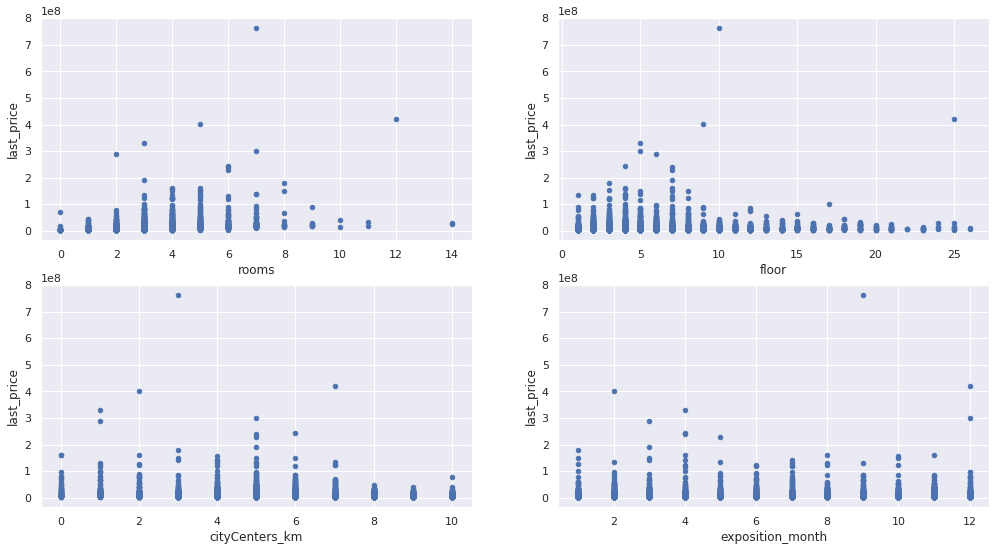

In [90]:
# посмотрим, как влияют некоторые факторы на стоимость квартиры
fg, ax = plt.subplots(2,2, figsize=(17, 9))
center_data.plot('rooms', 'last_price', kind='scatter', ax=ax[0][0])
center_data.plot('floor', 'last_price', kind='scatter', ax=ax[0][1])
center_data.plot('cityCenters_km', 'last_price', kind='scatter', ax=ax[1][0])
center_data.plot('exposition_month', 'last_price', kind='scatter', ax=ax[1][1])

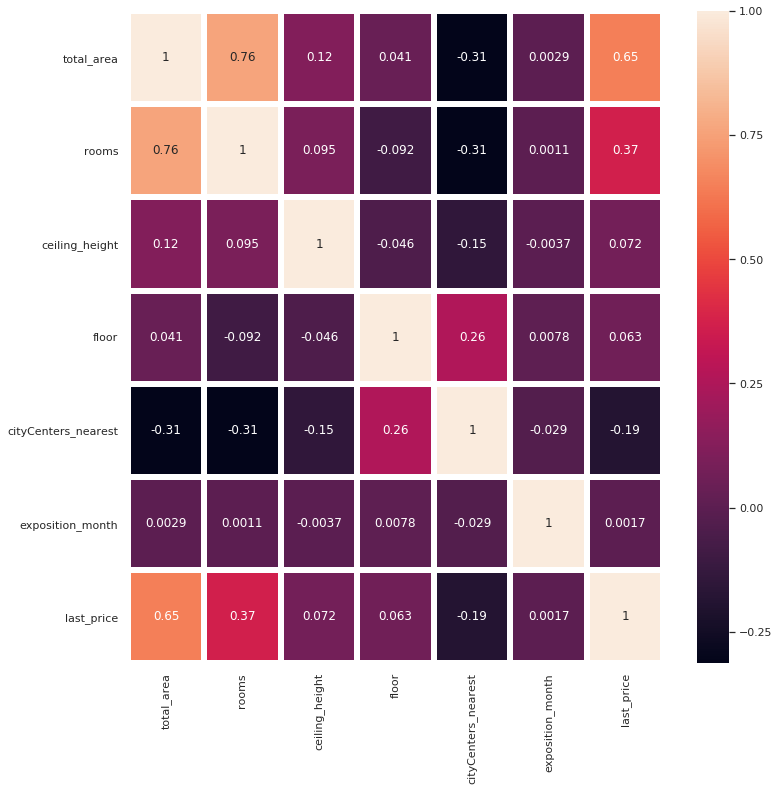

In [91]:
features = ['total_area', 'rooms', 'ceiling_height', 'floor', 'cityCenters_nearest', 'exposition_month', 'last_price']
corr1 = center_data[features].corr(method='pearson')
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr1, 
            xticklabels=corr1.columns,
            yticklabels=corr1.columns,
            annot=True,
            linewidth=5)

**Вывод:** как видно по графикам и коэф.корреляции, особых изменений в показателях зависимости не произошло. Также как и в общем случае, основным коррелирующим признаком с ценой остались общая площадь и количество комнат (макс.цена достигается также при 4-5 комнатах). Также отрицательная корреляция осталась и у признака удаленность от центра.

<a id='section5'></a>
### Шаг 5. Общий вывод

В конечном итоге мною были проанализированы данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.\
На первом этапе был проведен первичный взгляд на данные. Далее они были обработаны: найдены дубликаты, пропуски, аномальные значения, а также данные были категоризированы по различным условиям. Около 90% пропусков имеет признак **is_apartment**.\
Наибольшую зависимость цена имеет с признаками **total_area** и **rooms**, то есть общая площадь и количество комнат. Также на цену влияет удаленность от центра города, а также этаж (на первом этаже квартиры в среднем дешевле, а на последнем дороже).
Практически никакой зависимости нет между ценой и датой размещения, а также ценой и высотой потолков.\
В среднем самые дорогие квартиры находятся в Санкт-Петербурге.